This dataset is obtained from two solar power plants in India.

Solar energy is one of the more promising renewable sources of energy. It is harvested through solar panels.

Solar panels are made up of arrays of solar modules, which in turn are made up of smaller solar cells. These cells are also known as photovoltaic cells (PV cells). A conventional monocrystalline silicon PV cell is capable of producing around 0.5V of electricity.

The working principle of solar cells is as follows:

* Photons with sufficient energy (>1.12eV) will dislodge electrons from the silicon.
* These dislodged electrons will be accelerated from the valence band into the conduction band by the electric field from the PN junction.
* With the presence of a circuit, DC current flow will be generated.

Each photon has an energy of E = hc/λ. As h is constant, the parameters resulting in adequately energetic photons are its speed (c) and wavelength (λ). Ignoring the negligible changes of speed of light in air, the output of a solar cell is affected by the wavelength of light AND the intensity of light (more photons, more energy). Intuitively, the intensity of light varies throughout the day, and the wavelength of light that impedes a solar cell also varies throughout the day due to atmospheric scattering. We will explore how the irradiation, module temperature, and ambient temperature, reflect these changes.

In a typical Solar Energy Generating System (SEGS), solar energy is converted into electricity in the form of Direct Current (DC) by the solar panels. This DC is then passed through an inverter to convert it to Alternating Current (AC) which is better suited for transmission through the centralized power grid.

![Solar Energy Generating System](solar_energy_system.png "Solar Energy Generating System")

The above diagram depicts a typical Solar Energy Generating System (SEGS)

We will conduct an exploratory data analysis on this dataset to discover some key relationships, analytics, and correlations between the features provided. We will then make some educated guesses on the underlying factors to the patterns discovered. After that, we will conduct a regression analysis in order to obtain a deeper insight on the interactions and relationships between each feature. Lastly, we will try to make some predictive modelling from our linear regression and obtain a few key metrics to evaluate our model.

Challenges with PV Solar Power Generation:

1. Unlike conventional coal or gas based power plants, Solar Power Plants output are available during day time only and highly variable depending upon the availability of Sunlight.

2. Power generated has to be consumed instantly in the absence of a power storage (Battery storage is still emerging)

3. Spread over a large area, should be shadow free.

4. Regular cleaning of PV modules and physical fault detection in the field side.

Data Description

We have at hand solar power generation data and weather data of a solar plower plants. 

Plant_1_Generation_Data.csv : In this data set - DATE_TIME, PLANT_ID, DC_Power, AC_POWER, DAILY_YIELD, TOTAL_YIELD are given

Plant_1_Weather_Sensor_Data.csv : In this data set - DATE_TIME, PLANT_ID, SOURCE_KEY, AMBIENT_TEMPERATURE, MODULE_TEMPERATURE, IRRADIATION are given

* Peak sun hours (PSH): Daily irradiation is commonly referred to as daily PSH (or full sun hours). The number of PSH for the day is the number of hours for which power at the rate of 1kW/m2 would give an equivalent amount of energy to the total energy for that day. The terms peak sunlight hours and peak sunshine hours may also be used. 
* Irradiation: The total quantity of radiant solar energy per unit area received over a given period, e.g. daily, monthly or annually. 
* Insolation: Another term for irradiation. The amount of solar radiation, incident on the surface over a period of time, Peak sun hours (kWh/m2/ day) are a measurement of daily insolation. 
*Irradiance: The solar radiation incident on a surface at any particular point in time measured in W/m2.

![solar radiation intensity](Solar-radiation-intensity-during-the-three-typical-days.png "solar radiation intensity")

If sunlight is received at an irradiance of 1000W/m2 for 2 hours, 600W/m2 for 1.5 hours and 200W/m2 for 1 hour, the total radiation received that day is 3.

1PSH:
1000W/m2 × 2 hours + 600W/m2 × 1.5 hours + 200W/m2 × 1 hour = 3100W/m2/day

3100W/m2/day ÷ 1000W/m2/day = 3.1PSH

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Power Generation & Weather Sensor Data

In [2]:
gen_data = pd.read_csv("datasets/Plant_1_Generation_Data.csv")
weather_data = pd.read_csv("datasets/Plant_1_Weather_Sensor_Data.csv")

## Data Cleaning

In [7]:
gen_data

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [6]:
weather_data

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [6]:
gen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [7]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


Checking for unique inverters or sources

In [8]:
print("Unique SOURCE_KEYs in Generation Data: ", gen_data['SOURCE_KEY'].nunique())
print("Unique SOURCE_KEYs in Weather Data: ", weather_data['SOURCE_KEY'].nunique())


Unique SOURCE_KEYs in Generation Data:  22
Unique SOURCE_KEYs in Weather Data:  1


Converting DATE_TIME to datetime format

In [9]:
gen_data["DATE_TIME"] = pd.to_datetime(gen_data["DATE_TIME"], format = '%d-%m-%Y %H:%M')
weather_data["DATE_TIME"] = pd.to_datetime(weather_data["DATE_TIME"], format = '%Y-%m-%d %H:%M:%S')

weather_data["DATE_TIME"] = weather_data["DATE_TIME"].dt.floor('min')

Merging datasets

In [10]:
df = pd.merge(gen_data, weather_data.drop(columns=["SOURCE_KEY"]), on = "DATE_TIME")

In [11]:
df["DATE"] = df["DATE_TIME"].dt.date
df["TIME"] = df["DATE_TIME"].dt.time
df["HOUR"] = df["DATE_TIME"].dt.hour
df["DAY"] = df["DATE_TIME"].dt.day

In [12]:
df

,DATE_TIME,PLANT_ID_x,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,HOUR,DAY
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,4135001,25.184316,22.857507,0.0,2020-05-15,00:00:00,0,15
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,4135001,25.184316,22.857507,0.0,2020-05-15,00:00:00,0,15
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,4135001,25.184316,22.857507,0.0,2020-05-15,00:00:00,0,15
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,4135001,25.184316,22.857507,0.0,2020-05-15,00:00:00,0,15
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,4135001,25.184316,22.857507,0.0,2020-05-15,00:00:00,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,4135001,21.909288,20.427972,0.0,2020-06-17,23:45:00,23,17
68770,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,4135001,21.909288,20.427972,0.0,2020-06-17,23:45:00,23,17
68771,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,4135001,21.909288,20.427972,0.0,2020-06-17,23:45:00,23,17
68772,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,4135001,21.909288,20.427972,0.0,2020-06-17,23:45:00,23,17


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68774 entries, 0 to 68773
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            68774 non-null  datetime64[ns]
 1   PLANT_ID_x           68774 non-null  int64         
 2   SOURCE_KEY           68774 non-null  object        
 3   DC_POWER             68774 non-null  float64       
 4   AC_POWER             68774 non-null  float64       
 5   DAILY_YIELD          68774 non-null  float64       
 6   TOTAL_YIELD          68774 non-null  float64       
 7   PLANT_ID_y           68774 non-null  int64         
 8   AMBIENT_TEMPERATURE  68774 non-null  float64       
 9   MODULE_TEMPERATURE   68774 non-null  float64       
 10  IRRADIATION          68774 non-null  float64       
 11  DATE                 68774 non-null  object        
 12  TIME                 68774 non-null  object        
 13  HOUR                 68774 non-

# Data Cleaning

* Target Column = AC_POWER

Dropping Columns

* DC_POWER: Almost perfectly correlated with AC power → leakage
* TOTAL_YIELD: Cumulative → not useful for short-term prediction
* PLANT_ID: Only one plant → not useful for modeling
* SOURCE_KEY: Only useful if you're modeling by inverter

In [14]:
# dropping unnecessary columns

# df = df.drop(columns=["DC_POWER", "TOTAL_YIELD", "PLANT_ID"])

# Checking for Missing Values

Missing Values: 


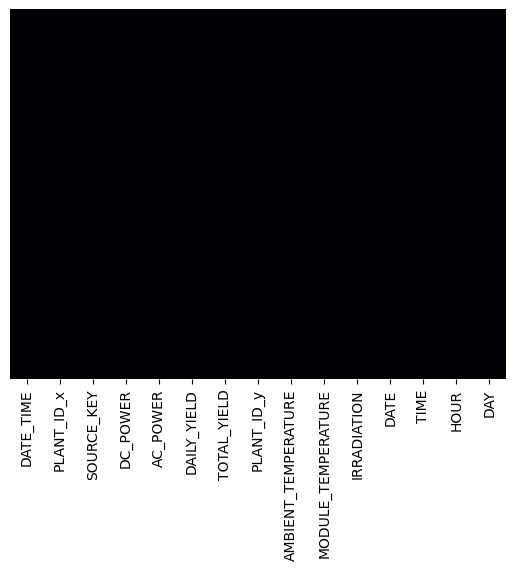

In [15]:
print("Missing Values: ")
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap = "magma")
plt.show()

There are no missing values

In [16]:
df.describe()

,DATE_TIME,PLANT_ID_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,HOUR,DAY
count,68774,68774.0,68774.000000,68774.000000,68774.000000,6.877400e+04,68774.0,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000
mean,2020-06-01 08:02:38.161514240,4135001.0,3147.177450,307.778375,3295.834644,6.978728e+06,4135001.0,25.558521,31.244997,0.232305,11.567075,15.762876
min,2020-05-15 00:00:00,4135001.0,0.000000,0.000000,0.000000,6.183645e+06,4135001.0,20.398505,18.140415,0.000000,0.000000,1.000000
25%,2020-05-24 00:33:45,4135001.0,0.000000,0.000000,0.000000,6.512007e+06,4135001.0,22.724491,21.123944,0.000000,6.000000,9.000000
50%,2020-06-01 14:15:00,4135001.0,428.571429,41.450000,2658.473214,7.146685e+06,4135001.0,24.670178,24.818984,0.031620,12.000000,16.000000
75%,2020-06-09 20:00:00,4135001.0,6365.468750,623.561161,6274.000000,7.268751e+06,4135001.0,27.960429,41.693659,0.454880,17.000000,23.000000
max,2020-06-17 23:45:00,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06,4135001.0,35.252486,65.545714,1.221652,23.000000,31.000000
std,NaN,0.0,4036.441826,394.394865,3145.220597,4.162707e+05,0.0,3.361300,12.308283,0.301948,6.862651,8.554460


# Checking for Faulty Inverters

In [17]:
print("There are {} inverters in Plant 1".format(df["SOURCE_KEY"].nunique()))

There are 22 inverters in Plant 1


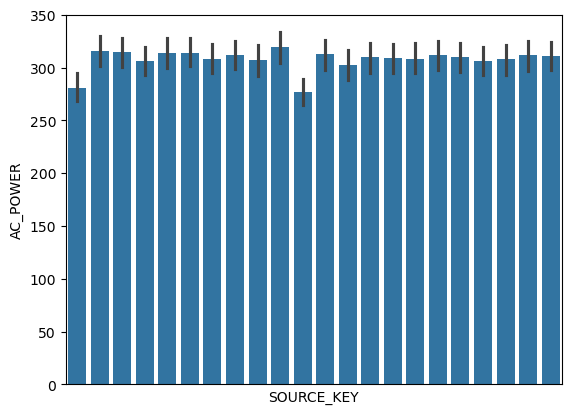

In [18]:
sns.barplot(x = "SOURCE_KEY", y = "AC_POWER", data = df)
plt.xticks([])
plt.show()

* Inverters in this plant have stable outputs

In [19]:
df["DATE"].nunique()

34

# Observe relationship between power generation data features

In [20]:
df.columns

Index(['DATE_TIME', 'PLANT_ID_x', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD', 'PLANT_ID_y', 'AMBIENT_TEMPERATURE',
       'MODULE_TEMPERATURE', 'IRRADIATION', 'DATE', 'TIME', 'HOUR', 'DAY'],
      dtype='object')

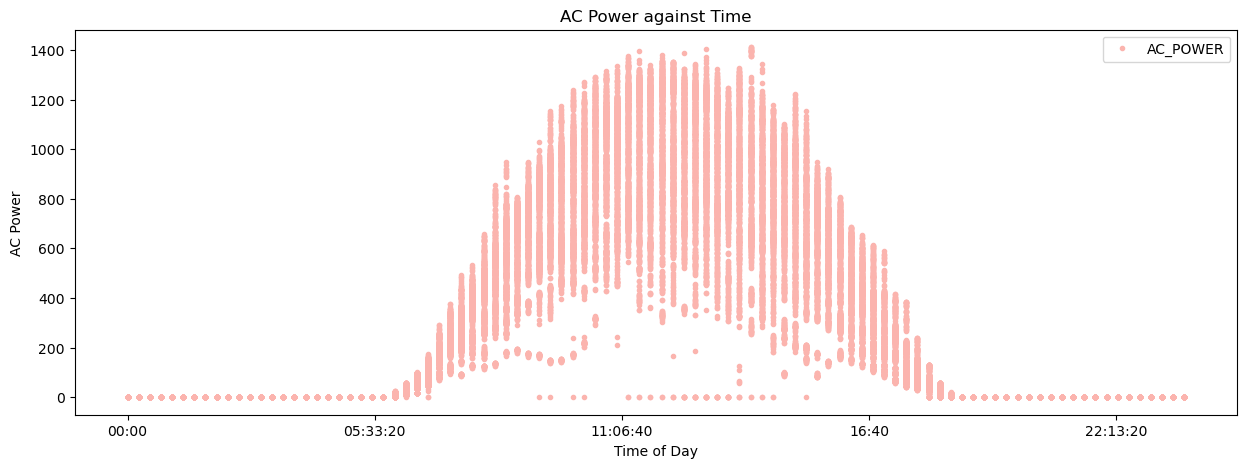

In [21]:
df.plot(x = "TIME", y = "AC_POWER", style = ".", figsize=(15, 5), colormap="Pastel1")
plt.ylabel("AC Power")
plt.xlabel("Time of Day")
plt.title("AC Power against Time")
plt.show()

* From midnight to around early morning (~5:30 AM), the AC power is consistently zero. This likely corresponds to the period when there is no sunlight.

* Around 6:00 AM, the power begins to rise rapidly, indicating solar generation starting with the rising sun.

* The AC power peaks between ~10:00 AM and 2:00 PM, where the solar irradiance is highest. You can see a dense concentration of higher values during this period.

* After 2:00 PM, the power starts to decline steadily until it reaches zero again around sunset.

* There's a noticeable vertical spread in the data points at each time, especially during the middle of the day. This could be due to:
    * Passing clouds
    * Shading
    * Inverter behavior
    * Measurement frequency or resolution

Correlation Matrix

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68774 entries, 0 to 68773
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            68774 non-null  datetime64[ns]
 1   PLANT_ID_x           68774 non-null  int64         
 2   SOURCE_KEY           68774 non-null  object        
 3   DC_POWER             68774 non-null  float64       
 4   AC_POWER             68774 non-null  float64       
 5   DAILY_YIELD          68774 non-null  float64       
 6   TOTAL_YIELD          68774 non-null  float64       
 7   PLANT_ID_y           68774 non-null  int64         
 8   AMBIENT_TEMPERATURE  68774 non-null  float64       
 9   MODULE_TEMPERATURE   68774 non-null  float64       
 10  IRRADIATION          68774 non-null  float64       
 11  DATE                 68774 non-null  object        
 12  TIME                 68774 non-null  object        
 13  HOUR                 68774 non-

In [23]:
columns_to_use = ['AC_POWER', 'DAILY_YIELD', 'AMBIENT_TEMPERATURE',
                  'MODULE_TEMPERATURE', 'IRRADIATION']
corr = df[columns_to_use].corr()
print(corr)

                     AC_POWER  DAILY_YIELD  AMBIENT_TEMPERATURE  \
AC_POWER             1.000000     0.082193             0.724903   
DAILY_YIELD          0.082193     1.000000             0.478496   
AMBIENT_TEMPERATURE  0.724903     0.478496             1.000000   
MODULE_TEMPERATURE   0.954924     0.198308             0.855420   
IRRADIATION          0.989340     0.078317             0.725278   

                     MODULE_TEMPERATURE  IRRADIATION  
AC_POWER                       0.954924     0.989340  
DAILY_YIELD                    0.198308     0.078317  
AMBIENT_TEMPERATURE            0.855420     0.725278  
MODULE_TEMPERATURE             1.000000     0.961511  
IRRADIATION                    0.961511     1.000000  


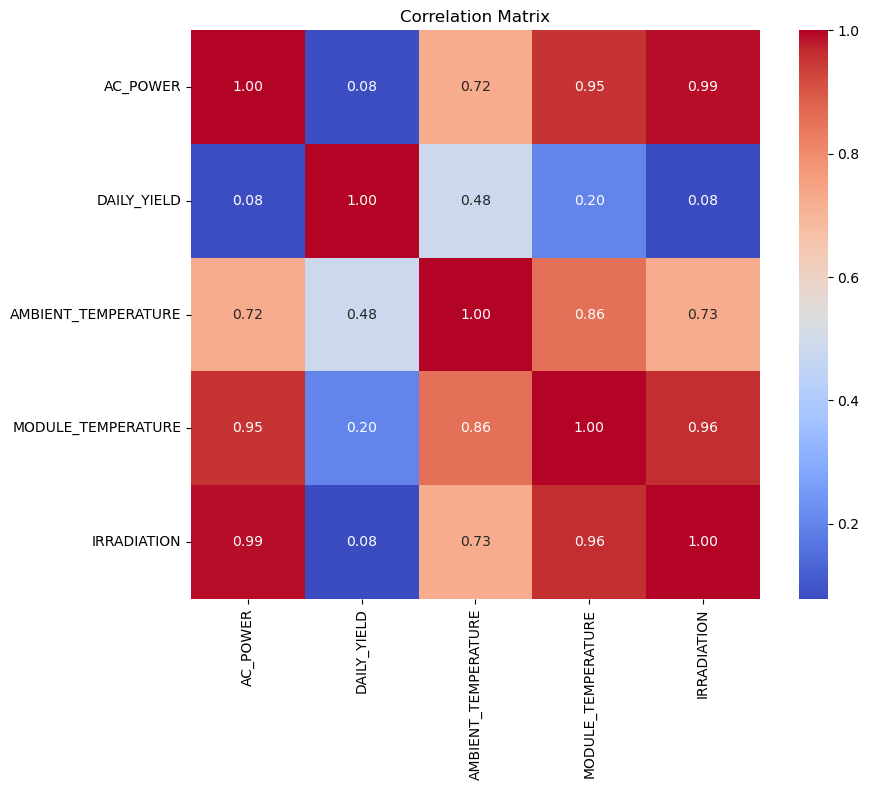

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

AC_POWER
* Strongest correlations:
    * IRRADIATION → 0.99
    * MODULE_TEMPERATURE → 0.95
    * AMBIENT_TEMPERATURE → 0.72

- AC power output is almost perfectly correlated with irradiation, as expected in solar systems. Module and ambient temperature also positively influence AC power.

IRRADIATION
* Highly correlated with:
    * AC_POWER → 0.99
    * MODULE_TEMPERATURE → 0.96
    * AMBIENT_TEMPERATURE → 0.73

- Higher solar irradiation results in more AC power and higher temperatures in both the module and the surrounding air. This is consistent with physical expectations.

# Observe relationship between sensor data features

### Irradiation

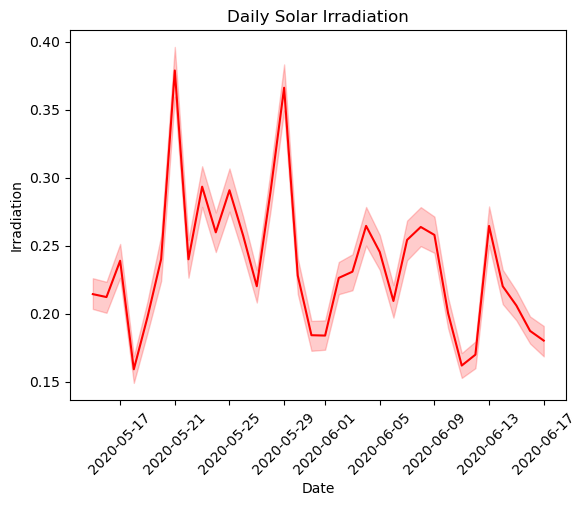

In [25]:
sns.lineplot(x = "DATE", y = "IRRADIATION", data = df, err_style="band", color = "red")

plt.ylabel('Irradiation')
plt.xlabel('Date')
plt.title('Daily Solar Irradiation')
plt.xticks(rotation=45)
plt.show()

### Module Temperature

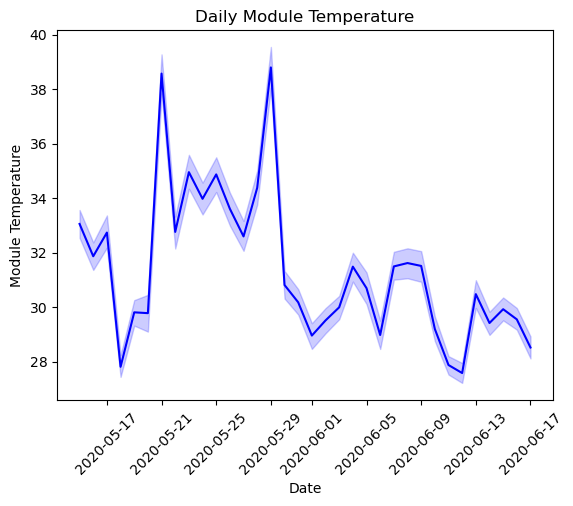

In [26]:

sns.lineplot(x='DATE', y='MODULE_TEMPERATURE', data=df, err_style='band', color='blue')

plt.ylabel('Module Temperature')
plt.xlabel('Date')
plt.title('Daily Module Temperature')
plt.xticks(rotation=45)
plt.show()

### Ambient Temperature

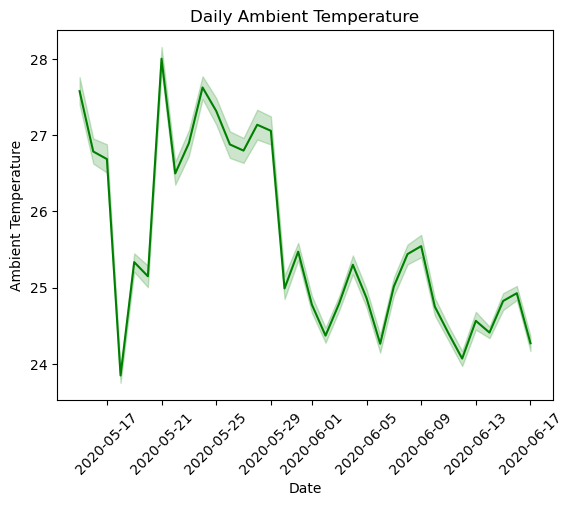

In [27]:
sns.lineplot(x='DATE', y='AMBIENT_TEMPERATURE', data=df, err_style='band', color='green')

plt.ylabel('Ambient Temperature')
plt.xlabel('Date')
plt.title('Daily Ambient Temperature')
plt.xticks(rotation=45)
plt.show()

### Temperature sensors

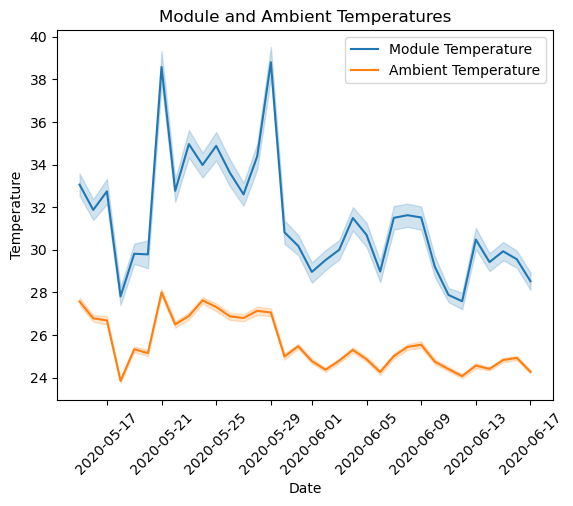

In [28]:
tempsens = sns.lineplot(x='DATE', y='MODULE_TEMPERATURE', data=df, err_style='band', label='Module Temperature')
sns.lineplot(x='DATE', y='AMBIENT_TEMPERATURE', data=df, err_style='band', label='Ambient Temperature', ax=tempsens)
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.title('Module and Ambient Temperatures')
plt.xticks(rotation=45)
plt.show()

* Module Temperature is always higher than Ambient Temperature

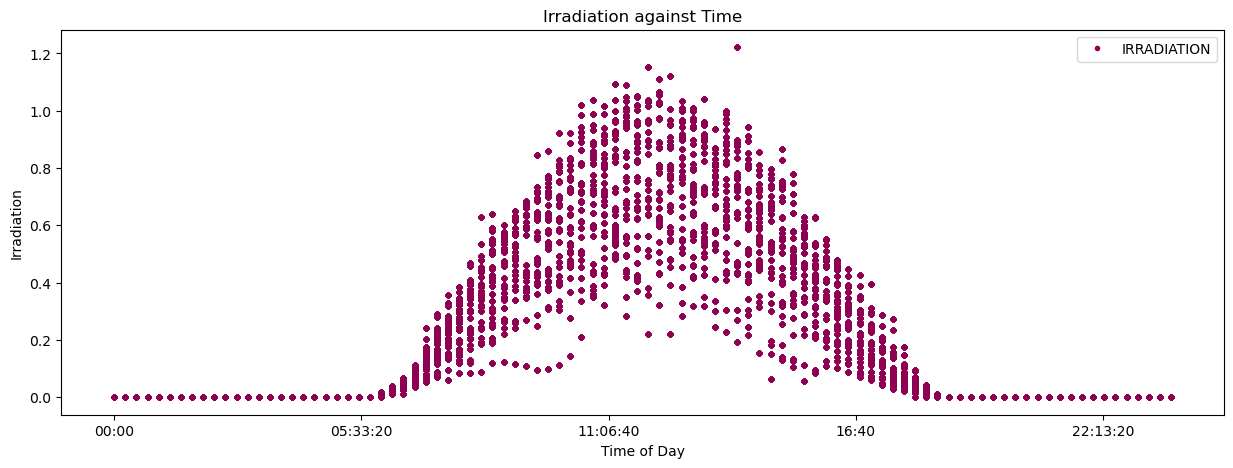

In [29]:
df.plot(x= 'TIME', y='IRRADIATION', style='.', figsize = (15, 5), colormap='PiYG') 
plt.ylabel('Irradiation')
plt.xlabel('Time of Day')
plt.title('Irradiation against Time')
plt.show()

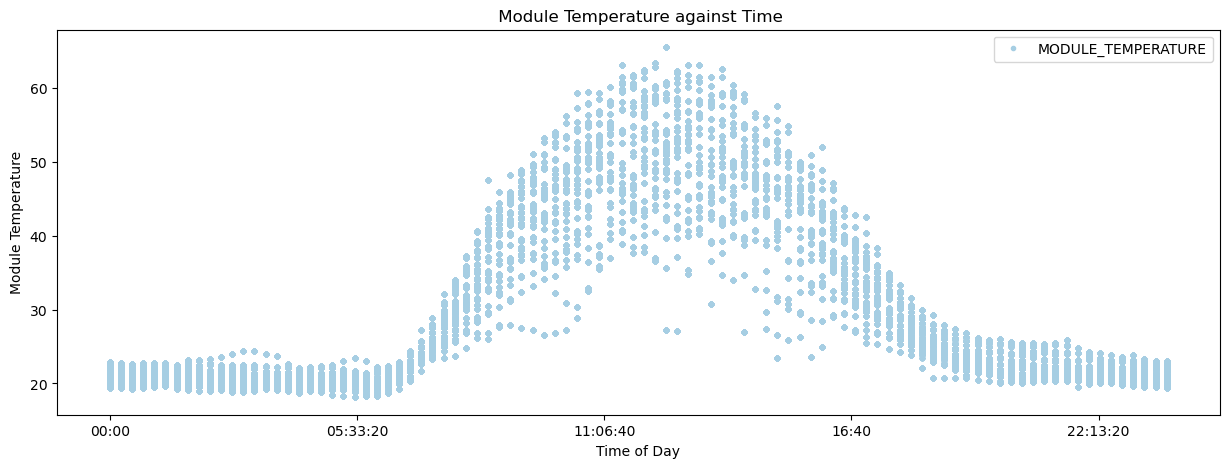

In [30]:
df.plot(x= 'TIME', y='MODULE_TEMPERATURE', style='.', figsize = (15, 5), colormap='Paired') 
plt.ylabel('Module Temperature')
plt.xlabel('Time of Day')
plt.title(' Module Temperature against Time')
plt.show()

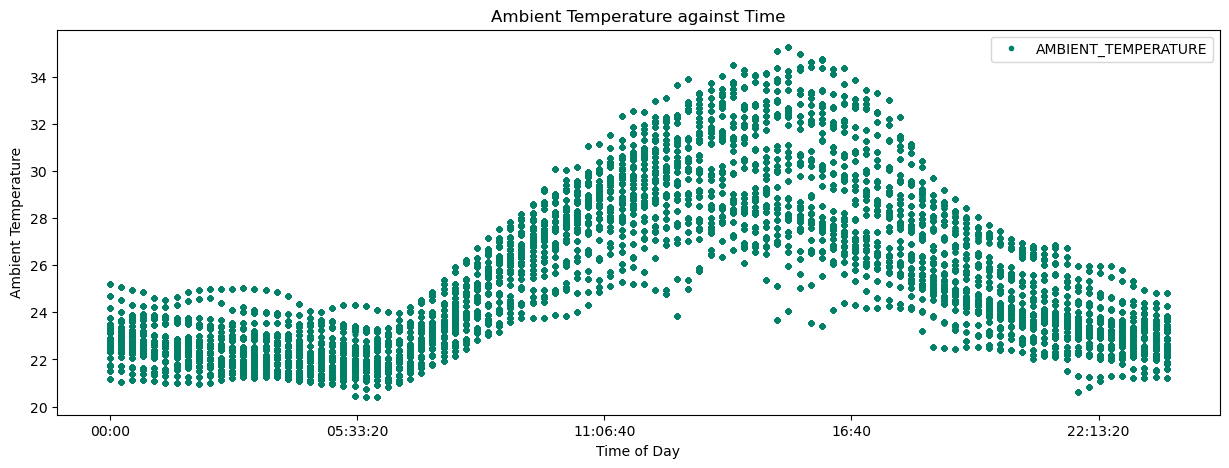

In [31]:
df.plot(x= 'TIME', y='AMBIENT_TEMPERATURE', style='.', figsize = (15, 5), colormap='summer') 
plt.ylabel('Ambient Temperature')
plt.xlabel('Time of Day')
plt.title('Ambient Temperature against Time')
plt.show()

* Ambient temperature goes down much later in the evening as compared to module temperature. This could mean that the specific heat capacity of the module is much lower than the specific heat capacity of the surrounding atmosphere.

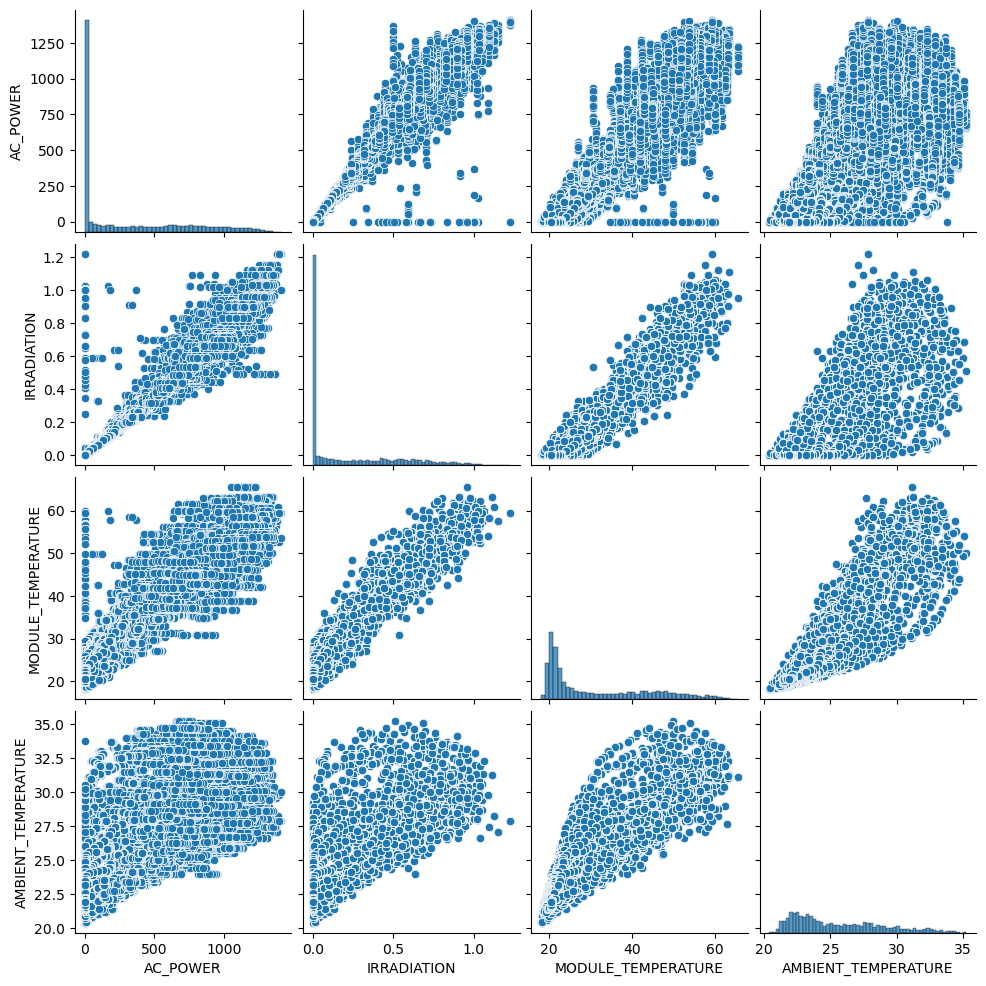

In [32]:
sns.pairplot(df[['AC_POWER', 'IRRADIATION', 'MODULE_TEMPERATURE', 'AMBIENT_TEMPERATURE']])
plt.show()

1. AC_POWER vs IRRADIATION
Strong positive correlation — as IRRADIATION increases, AC_POWER increases almost linearly.

However, there's a spike at AC_POWER = 0, even for moderate IRRADIATION — likely early morning, nighttime, or faults.

2. AC_POWER vs MODULE_TEMPERATURE
Strong positive trend — as modules get hotter, power goes up (due to more sunlight).

Beyond a point, the gain flattens — possible thermal efficiency limit.

3. AC_POWER vs AMBIENT_TEMPERATURE
Positive correlation but more scattered.

Ambient temp has less direct influence compared to irradiation/module temperature.

4. IRRADIATION vs MODULE_TEMPERATURE
Very strong positive correlation — makes sense, as more sunlight heats the modules.

Strong clustering suggests consistent module behavior.

5. IRRADIATION vs AMBIENT_TEMPERATURE
Correlated, but less tightly than with module temp — possibly affected by time of year/clouds/wind.

6. MODULE_TEMPERATURE vs AMBIENT_TEMPERATURE
Tight positive correlation — module temps follow ambient, but are consistently higher due to direct sunlight.

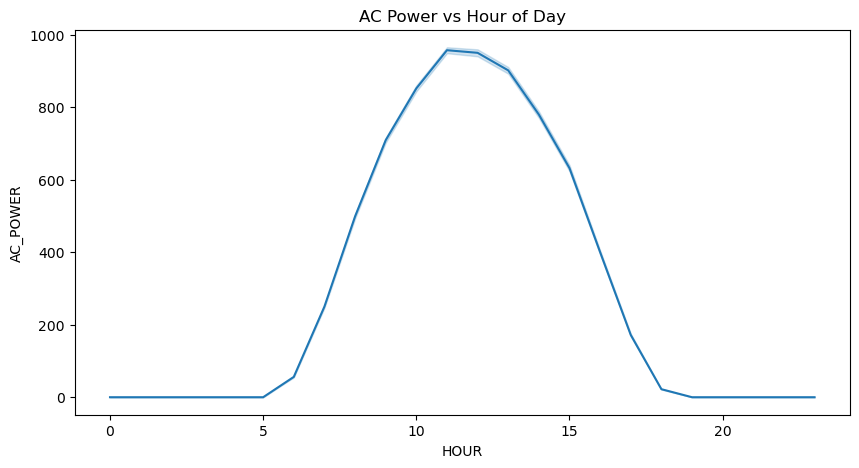

In [33]:
plt.figure(figsize=(10,5))
sns.lineplot(x='HOUR', y='AC_POWER', data=df)
plt.title('AC Power vs Hour of Day')
plt.show()

# Filtering zero-output cases

In [34]:
def classify_zero_ac(row):
    if row['AC_POWER'] == 0:
        if row['IRRADIATION'] == 0:
            return 'Night'
        else:
            return 'Fault/Suspicious'
    else:
        return 'Normal'

df['AC_POWER_STATE'] = df.apply(classify_zero_ac, axis=1)

<Axes: xlabel='IRRADIATION', ylabel='AC_POWER'>

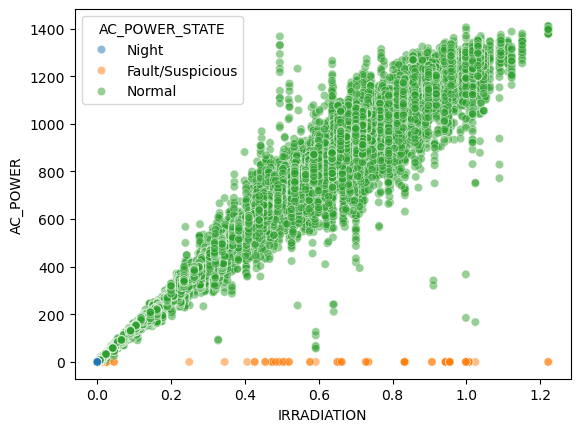

In [35]:
import seaborn as sns
sns.scatterplot(data=df, x='IRRADIATION', y='AC_POWER', hue='AC_POWER_STATE', alpha=0.5)


In [36]:
df_normal = df[df['AC_POWER_STATE'] == 'Normal'].copy()

In [37]:
df_normal.head()

,DATE_TIME,PLANT_ID_x,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,HOUR,DAY,AC_POWER_STATE
510,2020-05-15 06:00:00,4135001,1BY6WEcLGh8j5v7,37.142857,3.585714,0.0,6259559.0,4135001,24.088446,22.206757,0.005887,2020-05-15,06:00:00,6,15,Normal
511,2020-05-15 06:00:00,4135001,1IF53ai7Xc0U56Y,53.500000,5.162500,0.0,6183645.0,4135001,24.088446,22.206757,0.005887,2020-05-15,06:00:00,6,15,Normal
512,2020-05-15 06:00:00,4135001,3PZuoBAID5Wc2HD,58.000000,5.585714,0.0,6987759.0,4135001,24.088446,22.206757,0.005887,2020-05-15,06:00:00,6,15,Normal
513,2020-05-15 06:00:00,4135001,7JYdWkrLSPkdwr4,58.428571,5.628571,0.0,7602960.0,4135001,24.088446,22.206757,0.005887,2020-05-15,06:00:00,6,15,Normal
514,2020-05-15 06:00:00,4135001,McdE0feGgRqW7Ca,54.375000,5.250000,0.0,7158964.0,4135001,24.088446,22.206757,0.005887,2020-05-15,06:00:00,6,15,Normal


# Train a Classifier to Predict Faults

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create binary target: 1 = Fault/Suspicious, 0 = Normal or Night
df['IS_FAULT'] = df['AC_POWER_STATE'].apply(lambda x: 1 if x == 'Fault/Suspicious' else 0)

# Select features
features = ['IRRADIATION', 'MODULE_TEMPERATURE', 'AMBIENT_TEMPERATURE', 'HOUR']  # Add more if desired
X = df[features]
y = df['IS_FAULT']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
rfc_model = RandomForestClassifier(random_state=42)
rfc_model.fit(X_train, y_train)

# Evaluate
y_pred = rfc_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13455
           1       0.98      0.96      0.97       300

    accuracy                           1.00     13755
   macro avg       0.99      0.98      0.99     13755
weighted avg       1.00      1.00      1.00     13755



| Metric    | Description |
|-----------|-------------|
| Precision	| How many predicted positives were correct? |
| Recall	| How many actual positives were correctly identified? |
| F1-Score	| Harmonic mean of precision & recall (balances the two) |
| Support	| Number of actual samples for each class |

| Class | Meaning          | Precision | Recall   | F1-score | Support |
| ----- | ---------------- | --------- | -------- | -------- | ------- |
| **0** | Normal           | **1.00**  | **1.00** | **1.00** | 13,455  |
| **1** | Fault/Suspicious | **0.98**  | **0.96** | **0.97** | 300     |


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 1. Filter normal data
df_normal = df[df['AC_POWER_STATE'] == 'Normal'].copy()

# 2. Feature Engineering
df_normal['HOUR_sin'] = np.sin(2 * np.pi * df_normal['HOUR'] / 24)
df_normal['HOUR_cos'] = np.cos(2 * np.pi * df_normal['HOUR'] / 24)

features = ['IRRADIATION', 'MODULE_TEMPERATURE', 'AMBIENT_TEMPERATURE', 'HOUR_sin', 'HOUR_cos']
target = 'AC_POWER'

X = df_normal[features]
y = df_normal[target]

# 3. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Model
rfr_model = RandomForestRegressor(random_state=42)
rfr_model.fit(X_train, y_train)

# 5. Evaluate
y_pred = rfr_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


R² Score: 0.980
MAE: 28.69
RMSE: 53.29


| Metric        | Interpretation                                                                                   |
| ------------- | ------------------------------------------------------------------------------------------------ |
| **R² = 0.98** | Model has captured almost all underlying relationships. Only 2% of variation is unexplained.     |
| **MAE = 28.69** |On average, the model's predictions deviate from the actual values by about 28.69 units, indicating a relatively low error considering the scale of power output. |
| **RMSE ≈ 53** | The model's average error is small, which is great given power outputs can reach into the 1000s. |


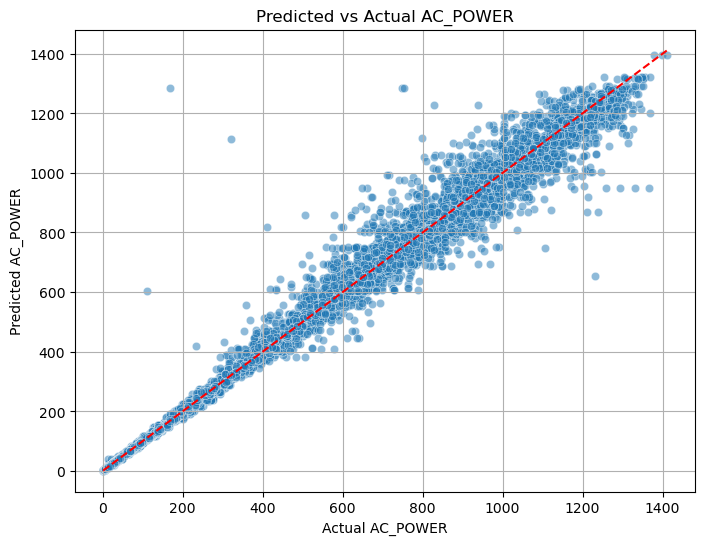

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel('Actual AC_POWER')
plt.ylabel('Predicted AC_POWER')
plt.title('Predicted vs Actual AC_POWER')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.grid(True)
plt.show()

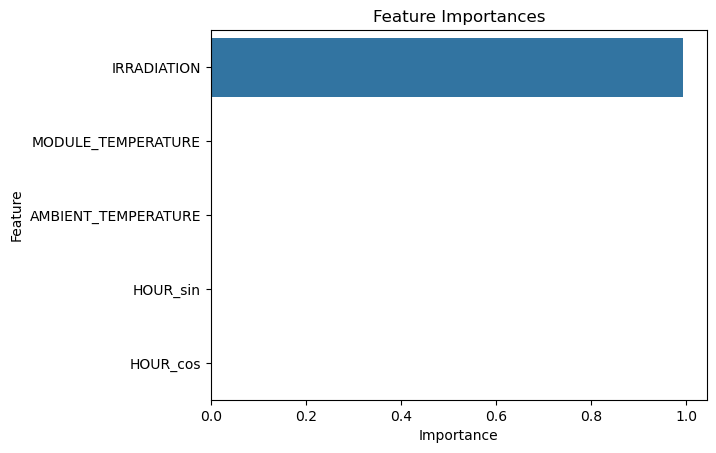

In [42]:
importances = rfr_model.feature_importances_
feature_names = X.columns

sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

Residual=Actual AC_POWER−Predicted AC_POWER

In [43]:
residuals = y_test - y_pred
print(residuals)

26005     -1.470265
40567   -179.407827
48592     -8.097718
18282     38.410369
55134    -46.187926
            ...    
4734      32.821116
22593   -197.141663
68140      5.886512
36424     -3.154946
8687       0.720450
Name: AC_POWER, Length: 7365, dtype: float64


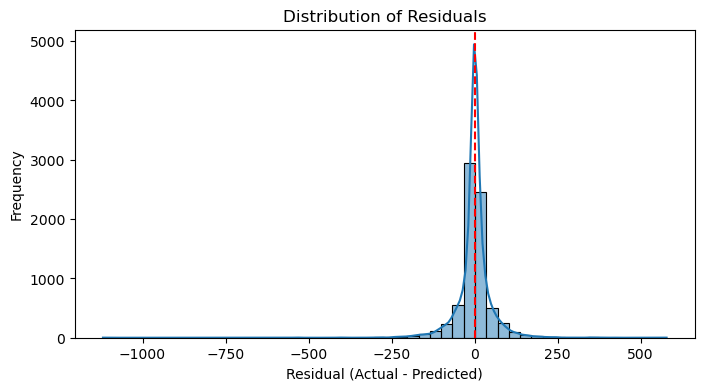

In [44]:
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True, bins=50)
plt.title("Distribution of Residuals")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--')
plt.show()

* This indicates no major bias in the model's predictions.
* The sharp peak means that for most samples, predictions are very close to actual.

Residuals vs. Predicted

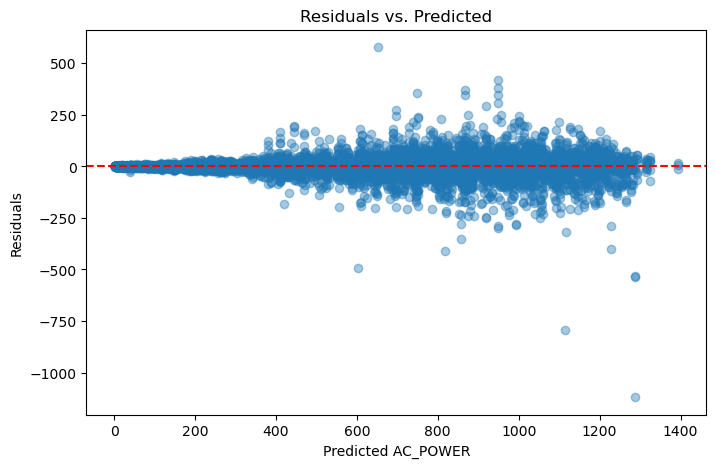

In [45]:
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted AC_POWER")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted")
plt.show()


# Outlier Detection and Removal

In [46]:
mean_res = np.mean(residuals)
std_res = np.std(residuals)
threshold = 3 * std_res

outlier_mask = np.abs(residuals - mean_res) > threshold

print(f"Total test samples: {len(residuals)}")
print(f"Outliers detected: {np.sum(outlier_mask)}")

Total test samples: 7365
Outliers detected: 145


creating clean test sets

In [47]:
X_test_clean = X_test[~outlier_mask]
y_test_clean = y_test[~outlier_mask]
y_pred_clean = y_pred[~outlier_mask]

# Metrics

In [63]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error


r2_clean = r2_score(y_test_clean, y_pred_clean)
mae_clean = mean_absolute_error(y_test_clean, y_pred_clean)
rmse_clean = root_mean_squared_error(y_test_clean, y_pred_clean)

print(f"R² after removing outliers: {r2_clean:.3f}")
print(f"MAE after removing outliers: {mae_clean:.2f}")
print(f"RMSE after removing outliers: {rmse_clean:.2f}")

R² after removing outliers: 0.989
MAE after removing outliers: 24.54
RMSE after removing outliers: 39.47


| Metric | Before Outlier Removal | After Outlier Removal | 
| ------ | ---------------------- | --------------------- | 
| R²     | 0.980                  | 0.989                 |   
| MAE     | 28.69                  | 24.54                 | 
| RMSE   | 53.29                  | 39.38                 | 


clean training data

In [49]:
# Predict on training data to get residuals
y_train_pred = rfr_model.predict(X_train)
residuals_train = y_train - y_train_pred

# Identify outliers in training residuals
mean_res_train = np.mean(residuals_train)
std_res_train = np.std(residuals_train)
threshold_train = 3 * std_res_train

outlier_mask_train = np.abs(residuals_train - mean_res_train) > threshold_train

# Remove outliers from training set
X_train_clean = X_train[~outlier_mask_train]
y_train_clean = y_train[~outlier_mask_train]

# Retrain model on cleaned training data
rfr_model_clean = RandomForestRegressor(random_state=42)
rfr_model_clean.fit(X_train_clean, y_train_clean)


RandomForestRegressor(random_state=42)

In [50]:
y_pred_clean = rfr_model_clean.predict(X_test_clean)

# Step 6: Compute and display metrics
r2_clean = r2_score(y_test_clean, y_pred_clean)
rmse_clean = np.sqrt(mean_squared_error(y_test_clean, y_pred_clean))

print(f"R² after retraining on cleaned data: {r2_clean:.3f}")
print(f"RMSE after retraining on cleaned data: {rmse_clean:.2f}")

R² after retraining on cleaned data: 0.989
RMSE after retraining on cleaned data: 39.47


In [51]:
import joblib

# Save the cleaned and retrained Random Forest model
joblib.dump(rfr_model_clean, 'ac_power_model_cleaned.pkl')

print("Model saved as 'ac_power_model_cleaned.pkl'")

Model saved as 'ac_power_model_cleaned.pkl'


cross checking

In [55]:
cross_check = pd.DataFrame({'Actual' : y_test_clean , 'Predicted' : y_pred_clean})
cross_check.head()

,Actual,Predicted
26005,74.628571,76.176419
48592,1175.275000,1183.853779
18282,1222.887500,1182.900168
55134,727.942857,774.380562
14294,1052.557143,1018.497637


In [71]:
cross_check['Actual'] = cross_check['Actual'].round(2)
cross_check['Predicted'] = cross_check['Predicted'].round(2)
cross_check['Error'] = (cross_check['Actual'] - cross_check['Predicted']).round(2)

cross_check.head()

,Actual,Predicted,Error
26005,74.63,76.18,-1.55
48592,1175.28,1183.85,-8.57
18282,1222.89,1182.90,39.99
55134,727.94,774.38,-46.44
14294,1052.56,1018.50,34.06


In [58]:
cross_check_final  = cross_check[cross_check['Error'] <= 20]
cross_check_final.sample(25).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted,Error
42665,1284.012500,1277.364211,6.648289
19739,47.114286,40.227234,6.887051
41008,26.225000,28.444018,-2.219018
63984,275.287500,273.093989,2.193511
12000,690.271429,672.700320,17.571108
797,352.857143,476.570333,-123.713190
11792,319.600000,344.402044,-24.802044
57354,826.162500,814.338980,11.823520
15735,318.971429,370.669336,-51.697907
24812,478.062500,506.817306,-28.754806


In [53]:
print(df_normal["AC_POWER"].describe())

count    36823.000000
mean       574.835021
std        370.135588
min          0.850000
25%        231.878571
50%        584.812500
75%        869.228571
max       1410.950000
Name: AC_POWER, dtype: float64
